In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')

In [3]:
outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')

In [84]:
fraud = pd.read_csv('Train-1542865627584.csv')

In [66]:
ip = inpatient[['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed']]
op = outpatient[['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed']]

In [100]:
patient = pd.concat([ip, op])

In [101]:
patient_duplicate = patient.groupby(['Provider','BeneID','InscClaimAmtReimbursed'])[['ClaimID']].nunique().reset_index()

In [102]:
patient_duplicate = patient_duplicate[patient_duplicate['InscClaimAmtReimbursed'] > 0]

In [103]:
patient_duplicate = patient_duplicate[patient_duplicate['ClaimID'] > 1]

In [104]:
patient_duplicate = patient_duplicate.groupby('Provider')[['BeneID']].count().sort_values(by='BeneID', ascending=False)

<AxesSubplot:>

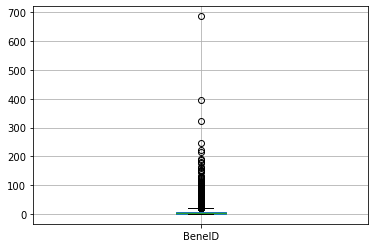

In [105]:
patient_duplicate.boxplot()

In [106]:
patient_duplicate_100 = patient_duplicate.head(100)

In [107]:
patient_duplicate_100 = pd.merge(patient_duplicate_100, fraud, on= "Provider")

In [108]:
patient_duplicate_100

,Provider,BeneID,PotentialFraud
0,PRV51459,686,Yes
1,PRV51574,396,Yes
2,PRV53797,324,Yes
3,PRV54895,248,Yes
4,PRV56011,222,Yes
5,PRV53918,217,Yes
6,PRV55039,192,Yes
7,PRV55004,187,Yes
8,PRV57103,180,Yes
9,PRV52064,177,Yes


In [109]:
patient_duplicate_100.insert(0, 'Rank', range(1, 1 + len(patient_duplicate_100)))
patient_duplicate_100

,Rank,Provider,BeneID,PotentialFraud
0,1,PRV51459,686,Yes
1,2,PRV51574,396,Yes
2,3,PRV53797,324,Yes
3,4,PRV54895,248,Yes
4,5,PRV56011,222,Yes
5,6,PRV53918,217,Yes
6,7,PRV55039,192,Yes
7,8,PRV55004,187,Yes
8,9,PRV57103,180,Yes
9,10,PRV52064,177,Yes


/Users/hyejinkim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rank', ylabel='BeneID'>

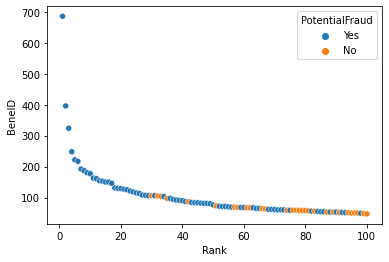

In [112]:
import seaborn as sns
sns.scatterplot('Rank', 'BeneID', data=patient_duplicate_100, hue='PotentialFraud')

In [48]:
inpatient_duplicate = inpatient.groupby(['Provider','BeneID','InscClaimAmtReimbursed'])[['ClaimID']].nunique().reset_index()

In [49]:
inpatient_duplicate = inpatient_duplicate[inpatient_duplicate['ClaimID'] > 1]

In [51]:
inpatient_duplicate = inpatient_duplicate.groupby('Provider')[['BeneID']].count().sort_values(by='BeneID', ascending=False)

In [54]:
inpatient_duplicate

,BeneID
Provider,
PRV52019,8
PRV54367,7
PRV52821,5
PRV55462,5
PRV51244,5
PRV55194,5
PRV51842,5
PRV51614,4
PRV52574,4
